# Data Exploration on FordGoBikes Data Trip

## by (Prateek Rana)

## Preliminary Wrangling

> This dataset has been taken from the FordGoBikes website, which tells us about how much a bike has been used in terms of duration and distance and what type of user has used it.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192082 entries, 0 to 192081
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             192082 non-null  int64  
 1   start_time               192082 non-null  object 
 2   end_time                 192082 non-null  object 
 3   start_station_id         191834 non-null  float64
 4   start_station_name       191834 non-null  object 
 5   start_station_latitude   192082 non-null  float64
 6   start_station_longitude  192082 non-null  float64
 7   end_station_id           191834 non-null  float64
 8   end_station_name         191834 non-null  object 
 9   end_station_latitude     192082 non-null  float64
 10  end_station_longitude    192082 non-null  float64
 11  bike_id                  192082 non-null  int64  
 12  user_type                192082 non-null  object 
 13  bike_share_for_all_trip  192082 non-null  object 
dtypes: f

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,192082.000000,191834.000000,192082.000000,192082.000000,191834.000000,192082.000000,192082.000000,192082.000000
mean,750.952473,132.841639,37.773438,-122.357820,131.218700,37.773570,-122.357419,4029.012609
std,1672.433843,109.662417,0.091433,0.109472,109.546275,0.091332,0.109058,1571.288901
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,333.000000,43.000000,37.770407,-122.412408,41.000000,37.771058,-122.411726,3088.000000
50%,528.000000,98.000000,37.780955,-122.398438,95.000000,37.781010,-122.398436,4748.000000
75%,821.000000,211.000000,37.795913,-122.294837,203.000000,37.796248,-122.294837,5173.000000
max,84002.000000,385.000000,37.880222,-121.874119,385.000000,37.880222,-121.874119,6638.000000


In [5]:
df.shape

(192082, 14)

In [6]:
df.user_type.value_counts()

Subscriber    168732
Customer       23350
Name: user_type, dtype: int64

In [7]:
df.bike_share_for_all_trip.value_counts()

No     176008
Yes     16074
Name: bike_share_for_all_trip, dtype: int64

In [8]:
# convert user_type into ordered categorical types
ordinal_var_dict = {'user_type': ['Subscriber', 'Customer']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [9]:
#converting unwanted ints into strings
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

In [10]:
# Converting logitudes and Latitudes into distances using haversine formula
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    All args must be of equal length.    
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [11]:
# Applying haversine
df['distance'] = haversine_np(df['start_station_longitude'],df['start_station_latitude'],df['end_station_longitude'],df['end_station_latitude'])

In [12]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,5.301868
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,3.857205
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,3.285035
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,0.999005
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,0.952756
5,6733,2019-01-31 22:35:50.8130,2019-02-01 00:28:04.5120,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,3532,Subscriber,No,0.910383
6,1188,2019-01-31 23:54:38.9010,2019-02-01 00:14:27.9000,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,146.0,30th St at San Jose Ave,37.742314,-122.423180,5114,Subscriber,No,4.726735
7,1254,2019-01-31 23:48:50.0920,2019-02-01 00:09:44.4970,318.0,San Carlos St at Market St,37.330698,-121.888979,314.0,Santa Clara St at Almaden Blvd,37.333988,-121.894902,3967,Subscriber,No,0.638405
8,3153,2019-01-31 23:17:05.4620,2019-02-01 00:09:39.4570,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,70.0,Central Ave at Fell St,37.773311,-122.444293,4813,Subscriber,No,1.096547
9,323,2019-01-31 23:59:47.5680,2019-02-01 00:05:11.1770,223.0,16th St Mission BART Station 2,37.764765,-122.420091,129.0,Harrison St at 20th St,37.758862,-122.412544,1976,Subscriber,No,0.932696


In [13]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,distance
count,192082.000000,192082.000000,192082.000000,192082.000000,192082.000000,192082.000000
mean,750.952473,37.773438,-122.357820,37.773570,-122.357419,1.695968
std,1672.433843,0.091433,0.109472,0.091332,0.109058,1.102914
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,0.000000
25%,333.000000,37.770407,-122.412408,37.771058,-122.411726,0.911730
50%,528.000000,37.780955,-122.398438,37.781010,-122.398436,1.440511
75%,821.000000,37.795913,-122.294837,37.796248,-122.294837,2.232399
max,84002.000000,37.880222,-121.874119,37.880222,-121.874119,61.220855


### What is the structure of your dataset?

> There are 192082 times the bikes have been issued by the Ford Go Bikes company in January, 2019. There are 14 columns out of which the numerical variable is the duration column containing the number of seconds the bike was issued for.

- Timestamps are given as *start_time* and *end_time*.
- Starting station's latitude and longtitude is given along with the station id. Same for the ending station.
- A bike id is given.
- User type: whether the user is a subscriber of the company's service or just a customer for the day.
- If the bike has been shared for all trip: Yes or No.
- I have also used haversine formula to calculate, with the given latitudes and longitudes, the distance traveled by each bike in km.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interest in figuring out how is a bike ride on an average, in the provided dataset. Also, the distance traveled by the bike.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think *duration* will be the most important feature that will support my investigation, however I might have to convert it into minutes for better understanding. I can then see whether the bikes are more used by customers or subscribers, and who uses it for more time. Also, the distance covered by a bike.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

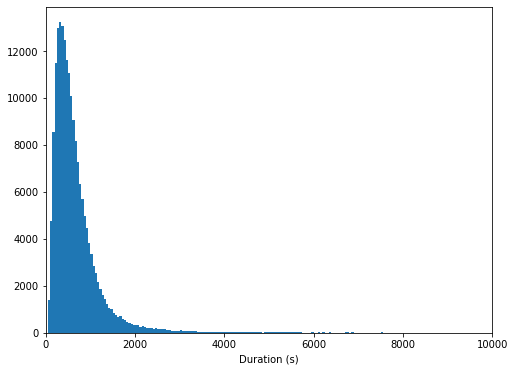

In [14]:
#starting with duration

bin_edges = np.arange(0, df['duration_sec'].max()+1, 50)

plt.figure(figsize = (8, 6))
plt.hist(data=df, x='duration_sec', bins = bin_edges)
plt.xlabel('Duration (s)');
plt.xlim(0, 10000);

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


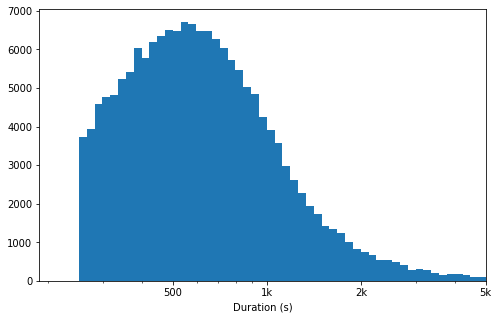

In [15]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (s)')
plt.xlim(0, 5e3)
plt.show();

> The duration of the bike being ridden is unimodal, but still skewed to the right even after performing log values. This means that the bikes are ridden for smaller durations more than longer durations.

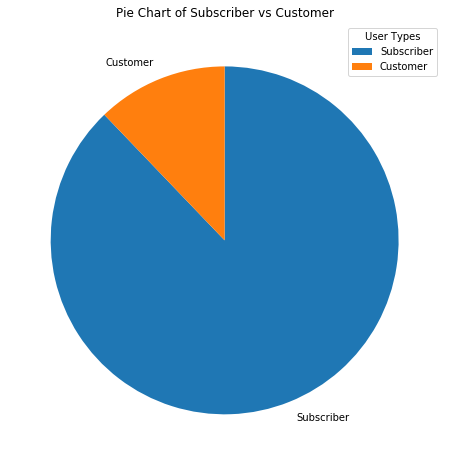

In [16]:
#Having a look at subscribers vs Customers
sorted_counts = df['user_type'].value_counts()
plt.figure(figsize=(8,8))

plt.pie(sorted_counts, labels = sorted_counts.index,  startangle=90, counterclock = False);
plt.legend(['Subscriber', 'Customer'], title='User Types')
plt.title('Pie Chart of Subscriber vs Customer');

> Clearly there are more subscribers to the company service than ordinary customers.

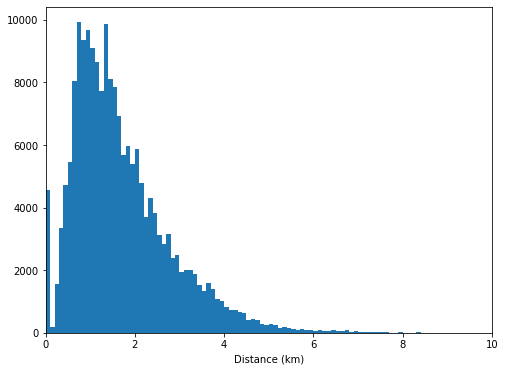

In [17]:
bin_edges = np.arange(0, df['distance'].max()+0.1, 0.1)

plt.figure(figsize = (8, 6))
plt.hist(data=df, x='distance', bins = bin_edges)
plt.xlabel('Distance (km)');
plt.xlim(0, 10);

> This graph shows us that the distance is quite bimodal with some people traveling for less than quarter of a kilometer while the majority of the users are riding for 1 - 1.5 kilometers. Then it decreases as the distance increases.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_sec variable had a large range of value, so I used log transformation. Under the transformation, the data looked unimodel with the peak at 550 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions, therefore no operations were required to change the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

To start off with, I want to look at the variables in a pairwise data. 

In [18]:
numeric_vars = ['duration_sec', 'distance']
categoric_vars = ['user_type']

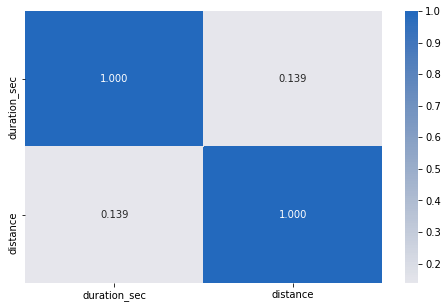

In [19]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show();

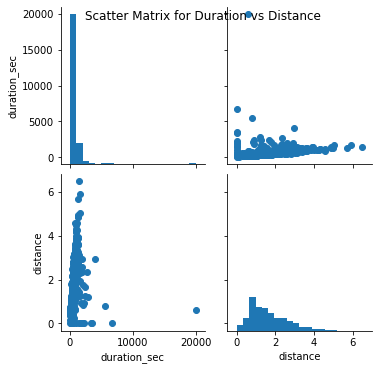

In [26]:
# plot matrix: sample 500 bike rides so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
g.fig.suptitle('Scatter Matrix for Duration vs Distance');

There is a correlation of 0.139 between distance and duration. That means there is a weak relationship between the two numeric variables present in this data.

However, with the help of the scatterplot we are able to identify a positive(weak) relationship between the two.

Moving on, I'll look at the relationship between the numerical variables with the categorical variables.

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

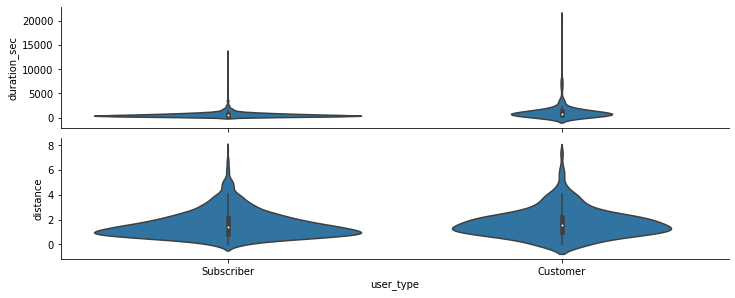

In [21]:
# plot matrix of numeric features against categorical features using a sample of 2000
samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp , y_vars = ['duration_sec', 'distance'], x_vars = categoric_vars, size = 2, aspect =5)
g.map(boxgrid)
plt.show();

Interestingly enough, there has been useful visual representation of the data here. As we can see, the subscribers tend to use the bikes for more duration than the customers. 

The subscribers and customers however cover similar distances.

In [22]:
def freq_poly(x, bins=10, **kwargs):
    if type(bins)==int:
        bins=np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:1])/2
    
    data_bins=pd.cut(x, bins, right=False, include_lowest = True)
    counts = x.groupby(data_bins).count()
    
    plt.errorbar(x=bin_centers, y=counts, **kwargs)

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


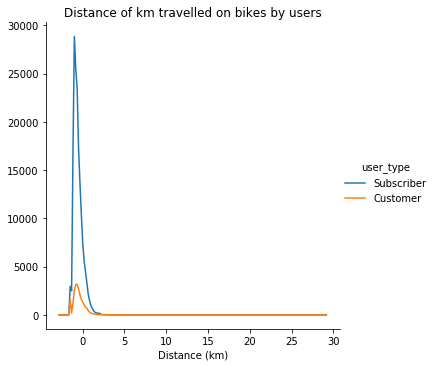

In [23]:
bin_edges = np.arange(-3, df['distance'].max()+1/3, 1/3)
g = sb.FacetGrid(data=df, hue = 'user_type', size=5)
g.map(freq_poly, "distance", bins = bin_edges)
g.add_legend()
plt.xlabel('Distance (km)')
plt.title('Distance of km travelled on bikes by users');

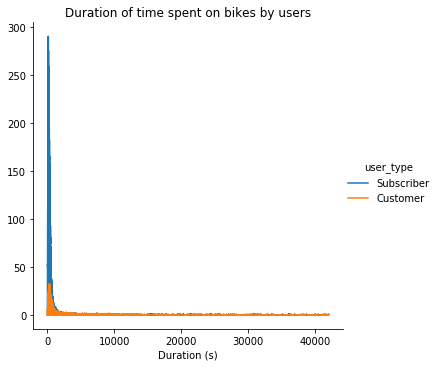

In [24]:
bin_edges = np.arange(-3, df['duration_sec'].max()+1/3, 1/3)
g = sb.FacetGrid(data=df, hue = 'user_type', size=5)
g.map(freq_poly, "duration_sec", bins = bin_edges)
g.add_legend()
plt.xlabel('Duration (s)')
plt.title('Duration of time spent on bikes by users');

In these two graphs above we can see the distance travelled by the users and the duration of time they spent on the bikes they used.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The correlation between both the numerical variables namely duration_sec and distance is 0.139, implying that there is a very weak relation between the two variables. However when I plotted a scatter matrix, we could see that there is a positive relationship between the two. In the diagnol of the scatter matrix we can see that most bikes take less duration of time and for the distance variable we can see that mostly users travel for 1.5 km, however there are users who go for more too.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Expected results were found when I plotted the violin plots grid. We could see that the subscribers are the users between both the type of users who use the bikes more. Even though, as we can interpret, that there are many outliers in the subscriber duration graph, in the customer duration graph, there are more users that use the bike for more time than the subscribers. But with immense number of outliers we can conclude that the subscribers use the bikes more.

> The dustance is more or less the same between the two groups, most of the users travel approximately 1.5 kilometers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

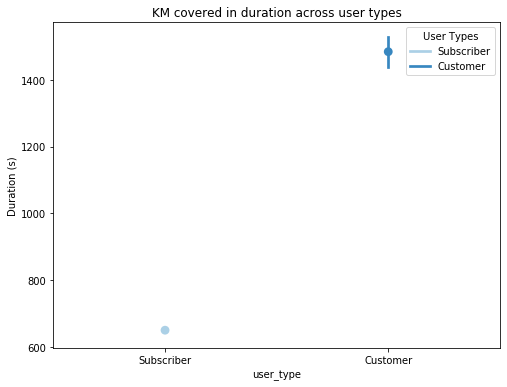

In [25]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_sec', palette = 'Blues')
plt.title('KM covered in duration across user types')
plt.ylabel('Duration (s)')
ax.set_yticklabels([],minor = True)
plt.legend(['Subscriber', 'Customer'], title='User Types')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Due to less amount of data, having only one categoric variable, I was not able to plot many graphs. 

### Were there any interesting or surprising interactions between features?

> However, I managed to plot an interesting pointplot where we can see that the customers seem to use the bikes for a longer duration. This contradicts the fact which we earlier tried to adhere, being: Subscribers spend more time on bikes than customers

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!